In [1]:
%pip install numpy==2.2.0 pandas==2.2.3 scikit-learn==1.6.0 matplotlib==3.9.3

  Using cached numpy-2.2.0.tar.gz (20.2 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [21 lines of output]
      + c:\Users\azzag\AppData\Local\Python\pythoncore-3.14-64\python.exe C:\Users\azzag\AppData\Local\Temp\pip-install-ictibtpn\numpy_0160dd58f39c49f1b62e19809bc0cb8c\vendored-meson\meson\meson.py setup C:\Users\azzag\AppData\Local\Temp\pip-install-ictibtpn\numpy_0160dd58f39c49f1b62e19809bc0cb8c C:\Users\azzag\AppData\Local\Temp\pip-install-ictibtpn\numpy_0160dd58f39c49f1b62e19809bc0cb8c\.mesonpy-0y0sdnq3 -Dbuildtype=release -Db_ndebug=if-release -Db_vscrt=md --native-file=C:\Users\azzag\AppData\Local\Temp\pip-install-ictibtpn\numpy_0160dd58f39c49f1b62e19809bc0cb8c\.mesonpy-0y0sdnq3\meson-python-native-file.ini
      The Meson build system
      Version: 1.5.2
      Source dir: C:\Users\azzag\AppData\Local\Temp\pip-install-ictibtpn\numpy_0160dd58f39c49f1b62e19809bc0cb8c
      Build dir: C:\Users\azzag\AppData\Local\Temp\pip-install-icti

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
from sklearn.preprocessing import StandardScaler
%pip install plotly
import plotly.express as px
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.9 MB 3.7 MB/s eta 0:00:03
   -- ------------------------------------- 0.5/9.9 MB 3.7 MB/s eta 0:00:03
   ---- ----------------------------------- 1.0/9.9 MB 1.4 MB/s eta 0:00:07
   ----- ---------------------------------- 1.3/9.9 MB 1.5 MB/s eta 0:00:06
   ------ --------------------------------- 1.6/9.9 MB 1.5 MB/s eta 0:00:06
   -------- ------------------------------- 2.1/9.9 MB 1.7 MB/s eta 0:00:05
   --------- ------------------------------ 2.4/9.9 MB 1.5 MB/s eta 0:00:05
   ----------- ---------------------------- 2.9/9.9 MB 1.7 MB/s eta 0:00:05
   ------------ --------------------------- 3.1/9.9 MB 1.7 MB/s eta 0:00:04
   --------------- ------------------------ 3.9/9.9 MB 1.8 MB/s eta 0:00:04
   ------------------ --------------------- 4.5/9.9 MB 1.9 MB/s eta 0:00:03
   -------------------- --

In [4]:
np.random.seed(0)

Input

n_samples: The total number of points equally divided among clusters.
Value will be: 5000
centres : The number of centres to generate, or the fixed centre locations.
Value will be: [[4, 4], [-2, -1], [2, -3],[1,1]]
cluster_std: The standard deviation of the clusters.
Value will be: 0.9

Output
X: Array of shape [n_samples, n_features]. (Feature Matrix)
The generated samples.
y: Array of shape [n_samples]. (Response Vector)
The integer labels for cluster membership of each sample.

In [5]:
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

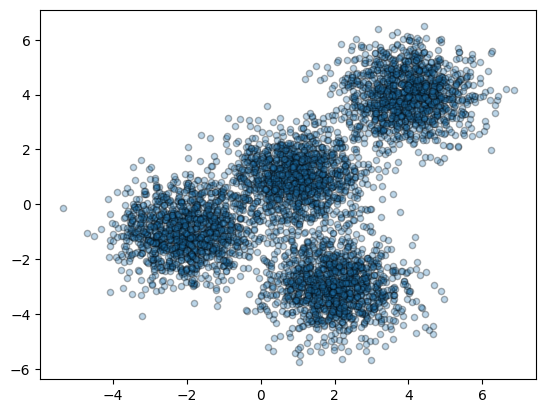

In [6]:
plt.scatter(X[:, 0], X[:, 1], marker='.',alpha=0.3,ec='k',s=80)

Setting up k-means
Now that we have our random data, let's set up our k-means Clustering.
The KMeans class has many parameters that can be used, but we will be using these three:

init: Initialization method of the centroids.
Value will be: k-means++
k-means++: Selects initial cluster centres for k-means clustering in a smart way to speed up convergence.
n_clusters: The number of clusters to form as well as the number of centroids to generate.
Value will be: 4 (since we have 4 centres)
n_init: Number of times the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.
Value will be: 12

In [7]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

In [8]:
k_means.fit(X)

,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",4
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'k-means++'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",12
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",None
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


In [9]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 3, 3, ..., 1, 0, 0], shape=(5000,), dtype=int32)

In [10]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

Creating the Visual Plot

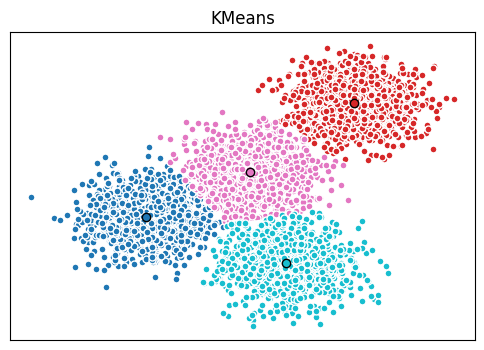

In [12]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.tab10(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4, 4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data points that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)

    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]

    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.',ms=10)

    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()


cluster the above dataset into a different number of clusters, say k=3. Note the difference in the pattern generated

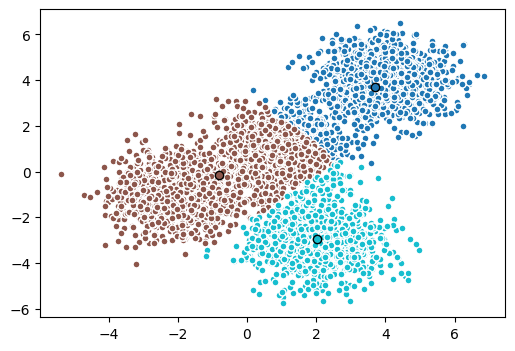

In [13]:
k_means3 = KMeans(init="k-means++", n_clusters=3, n_init=12)
k_means3.fit(X)
fig = plt.figure(figsize=(6, 4))
colors = plt.cm.tab10(np.linspace(0, 1, len(set(k_means3.labels_))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means3.cluster_centers_)), colors):
    my_members = (k_means3.labels_ == k)
    cluster_center = k_means3.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.',ms=10)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
plt.show()

the same with k=5.

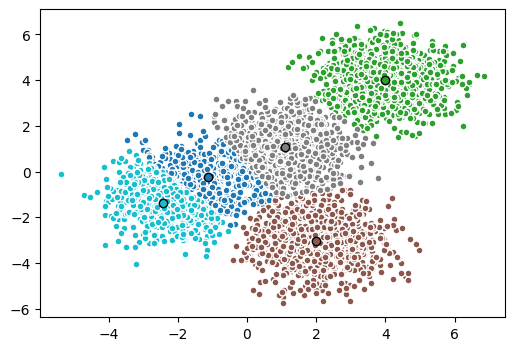

In [14]:
k_means3 = KMeans(init="k-means++", n_clusters=5, n_init=12)
k_means3.fit(X)
fig = plt.figure(figsize=(6, 4))
colors = plt.cm.tab10(np.linspace(0, 1, len(set(k_means3.labels_))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means3.cluster_centers_)), colors):
    my_members = (k_means3.labels_ == k)
    cluster_center = k_means3.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.',ms=10)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
plt.show()

Comment on the within-cluster sum of squares, i.e. inertia, of the clusters created for k=3 and k=5.

For k=3, the value of within-cluster sum of squares will be higher that that for k=4, since the points from different natural clusters are being grouped together, leading to underfitting of the k-means model. For k=5, the value of will be lesser than that for k=4, since the points are distributed into mode clusters than needed, leading to over-fitting of the k-means model.

<h1 id="customer_segmentation_K_means">Customer Segmentation with k-means</h1>


In [15]:
cust_df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/Cust_Segmentation.csv")
cust_df

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2
...,...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,NBA007,6.8
846,847,28,2,7,34,0.359,2.021,0.0,NBA002,7.0
847,848,25,4,0,18,2.802,3.210,1.0,NBA001,33.4
848,849,32,1,12,28,0.116,0.696,0.0,NBA012,2.9


<h2 id="pre_processing">Pre-processing</h2

In [16]:
cust_df = cust_df.drop('Address', axis=1)
# Drop NaNs from the dataframe
cust_df = cust_df.dropna()
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 0 to 849
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      700 non-null    int64  
 1   Age              700 non-null    int64  
 2   Edu              700 non-null    int64  
 3   Years Employed   700 non-null    int64  
 4   Income           700 non-null    int64  
 5   Card Debt        700 non-null    float64
 6   Other Debt       700 non-null    float64
 7   Defaulted        700 non-null    float64
 8   DebtIncomeRatio  700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 54.7 KB


Normalizing over the standard deviation

In [17]:
X = cust_df.values[:,1:] # leaves out `Customer ID`
Clus_dataSet = StandardScaler().fit_transform(X)

Modeling
Let's apply k-means to the data set.

In [18]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_

Insights

In [27]:
cust_df["Clus_km"] = labels

In [28]:

cust_df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,439.80226,32.775895,1.632768,6.169492,30.642185,1.003795,2.090910,0.284369,10.146893
1,374.00000,44.785714,3.000000,17.857143,219.714286,6.115429,11.546357,0.285714,8.064286
2,403.56129,41.103226,1.916129,15.135484,81.122581,3.024935,5.605258,0.180645,10.848387


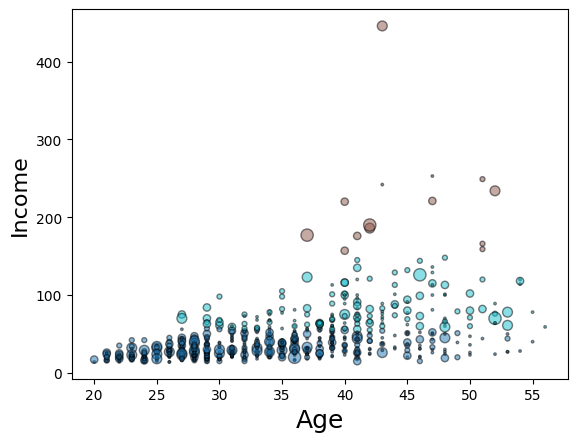

In [29]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(float), cmap='tab10', ec='k',alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)
plt.show()

In [45]:
%pip install --upgrade plotly nbformat

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
import plotly.io as pio
pio.renderers.default = 'iframe'  # 'iframe' is the most compatible mode

In [49]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

# Switch to 'browser' mode if 'iframe' or 'notebook' fails
pio.renderers.default = 'browser'

# 1. Clean the data (Take only 3 columns from your 8-column X)
df = pd.DataFrame(X[:, :3], columns=['Education', 'Age', 'Income'])

# 2. Build the plot
fig = px.scatter_3d(
    df, x='Education', y='Age', z='Income', 
    opacity=0.7, color=labels.astype(float)
)

# 3. Styling
fig.update_layout(width=1000, height=800, coloraxis_showscale=False)

# This will now pop open a new window in your web browser
fig.show()

Create a profile for each group, considering the common characteristics of each cluster based on your observations.

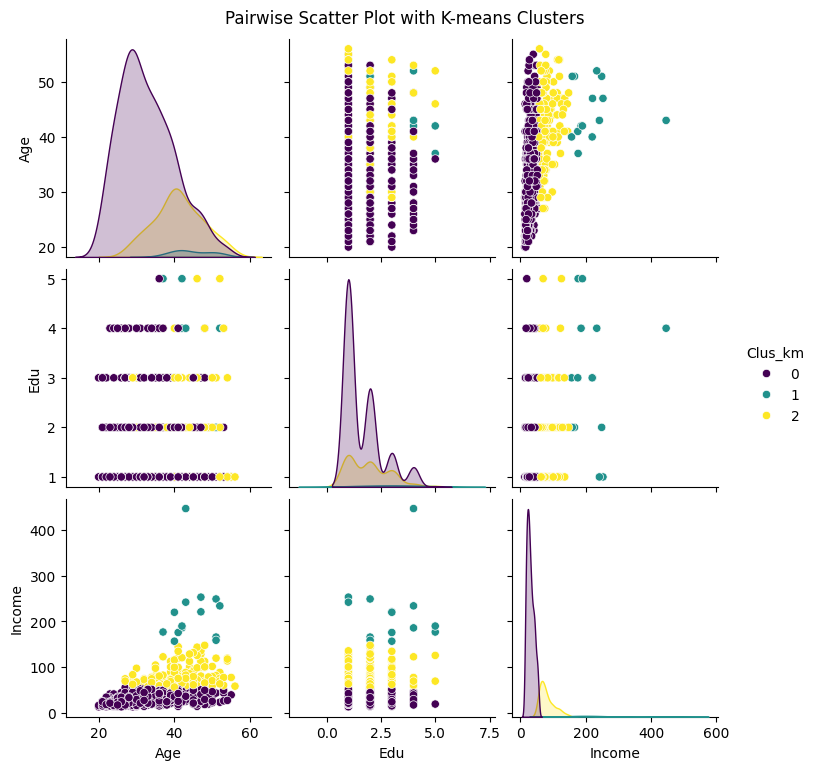

In [50]:
cust_df_sub = cust_df[['Age', 'Edu','Income','Clus_km']].copy() 
sns.pairplot(cust_df_sub, hue='Clus_km', palette='viridis', diag_kind='kde') 
plt.suptitle('Pairwise Scatter Plot with K-means Clusters', y=1.02)
plt.show()

The 3 clusters can be:
LATE CAREER, AFFLUENT, AND EDUCATED
MID CAREER AND MIDDLE INCOME
EARLY CAREER AND LOW INCOME